#  Statistics

In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px


In [2]:
data = pd.read_csv("visual_data.csv")

##  Find the correlation between the columns and draw the observations from it.

<AxesSubplot:>

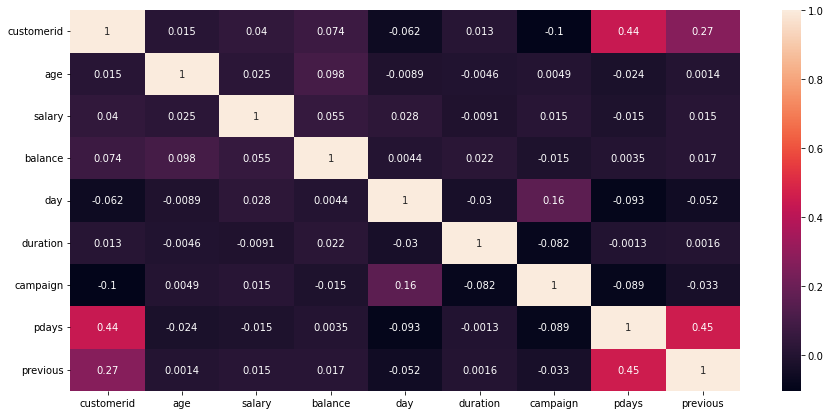

In [3]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

##  Find the mean of every column response wise and draw the observations.

In [7]:
data.groupby(["marital","age"]).mean()

customerid        salary      balance      day   duration  \
marital  age                                                              
divorced 24   38567.0000  20000.000000   513.000000  15.0000   2.000000   
         25   18633.5000  48333.333333  1236.500000  13.5000   5.500000   
         26   13244.6000  59500.000000   457.600000  19.0000   6.550000   
         27   19176.5000  51333.333333   357.666667  15.0000   5.777778   
         28   17953.6875  55375.000000   205.875000  14.8125   7.937500   
...                  ...           ...          ...      ...        ...   
single   72   40264.8000  55000.000000  1011.400000   4.6000   5.800000   
         73   42319.0000  55000.000000  1050.000000   4.0000   6.000000   
         77   41523.0000  55000.000000   300.000000   9.0000   9.000000   
         83   36421.0000  55000.000000  2657.000000  12.5000   9.500000   
         86   42461.0000  55000.000000   614.000000   9.0000  10.000000   

              campaign      pdays  previous  
marital  age                                 
divorced 24   3.000000  -1.000000  0.000000  
         25   2.833333  -1.000000  0.000000  
         26   3.050000  24.600000  0.150000  
         27   1.944444  49.555556  0.444444  
         28   1.937500  55.062500  1.625000  
...                ...        ...       ...  
single   72   3.000000  67.400000  3.600000  
         73   2.500000  90.000000  1.000000  
         77   1.000000  -1.000000  0.000000  
         83   2.000000  -1.000000  0.000000  
         86   1.000000  -1.000000  0.000000  

[197 rows x 8 columns]

##  Find the Best features using correlation and Chi-square test. 

In [8]:
def chisquare_test_result(data,col):
    data_crosstab = pd.crosstab(data['response'],data[col])
    stat,p,dof,exp = stats.chi2_contingency(data_crosstab)
    print('p-value: ',p)
    if p < 0.05:
        print('Reject H0: {} and responce columns are dependent'.format(col))
    else:
        print('Failed Reject H0: {} and responce columns are independent'.format(col))

In [11]:
for col in data.columns:
    print(chisquare_test_result(data,col))

p-value:  0.4977880952490809
Failed Reject H0: customerid and responce columns are independent
None
p-value:  3.1365698985220652e-291
Reject H0: age and responce columns are dependent
None
p-value:  6.47757569087296e-173
Reject H0: salary and responce columns are dependent
None
p-value:  3.086907272206965e-97
Reject H0: balance and responce columns are dependent
None
p-value:  4.2951509403897104e-172
Reject H0: Job and responce columns are dependent
None
p-value:  1.99057515908826e-51
Reject H0: Education and responce columns are dependent
None
p-value:  2.5139149590263615e-43
Reject H0: marital and responce columns are dependent
None
p-value:  1.507217106678986e-48
Reject H0: targeted and responce columns are dependent
None
p-value:  2.4246457302048724e-06
Reject H0: default and responce columns are dependent
None
p-value:  3.0876005122545862e-192
Reject H0: housing and responce columns are dependent
None
p-value:  2.052263623322484e-47
Reject H0: loan and responce columns are depende

##   Show that the columns are following the Normal Distribution or not, if not following try to convert it non-normal to normal. (use transformation techniques)

In [12]:
def central_limit_theorem(n, N,data,col):
    import random
    pop_mean = data[col].mean()
    sample_means = []
    for i in range(N):
        sample_means.append(np.mean(random.sample(list(data[col]),n)))
    mean_sample_means = np.mean(sample_means)
    sns.histplot(sample_means,kde = True)
    print('column name:',col)
    print('population mean :',pop_mean)
    print('mean of sample means:',mean_sample_means)
    print('sample size :',n)
    print('number of samples:',N)

column name: age
population mean : 40.935747327416394
mean of sample means: 40.91743
sample size : 100
number of samples: 1000


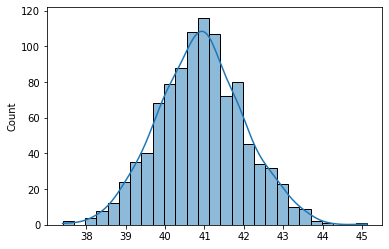

In [13]:
central_limit_theorem(100,1000,data,'age')